# Analysis for 2017-01-13 HST

In [57]:
%load_ext autoreload
%autoreload 2

from importlib import reload
from imaka.reduce.nights import reduce_2017_01_13 as redu
from imaka.analysis import plot_stats

reload(redu)
reload(plot_stats)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'imaka.analysis.plot_stats' from '/Users/jlu/code/python/imaka/imaka/analysis/plot_stats.py'>

## Date Reduction

Fully reduce the data from 20170113 HST. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga. 

In [ ]:
# Set this to whats appropriate for your machine.
redu.root_dir = '/Volumes/g/lu/data/imaka/2017_01_13/fli/'

redu.make_sky()
redu.make_flat()

# Reduce open-loop, TTF-loop closed, and closed-loop images.
redu.reduce_pleiades()

Find stars and calc stats tables. Again, be sure to load these back up to onaga.

In [ ]:
redu.find_stars_pleiades_open()
redu.find_stars_pleiades_ttf
redu.find_stars_pleiades_closed()

redu.calc_star_stats()

Stack images to make the final "deep" image for open, TTF, and closed-loop data sets. 

In [ ]:
redu.stack_pleiades_west_ttf()
redu.analyze_stacks()

## Fetch stats from onaga to local machine

All the stats files should be kept on onaga. But to sync up with this machine, you can run the following utility. You will probably need to run this in an ipython window rather than from the Jupyter notebook.


In [3]:
plot_stats.fetch_stats_from_onaga(['20170113'], '/Users/jlu/work/imaka/pleiades/')

imaka@onaga.ifa.hawaii.edu:/Volumes/DATA/imaka/20170113/fli/reduce/stats/stats*.fits
/Users/jlu/work/imaka/pleiades//20170113/fli/reduce/stats/


## Plot Statistics

Below we will make a suite of standard plots. Note the various statistics are plotted against frame number and time (UTC). Recall that we had two data sets for this night:

1. Pleiades East - FLI in East Orientation (data set suffix = 1)
2. Pleiades East - FLI in West Orientation (data set suffix = 2)

The best plots to look at are:
- Empirical FWHM vs. Time
- Radius of 50% EE vs. Time
- NEA vs. Time

The overall trend is that we are certainly seeing improvements in closed-loop. The TTF-loop isn't behaving as we would want it to.

### West Orientation (more stars)

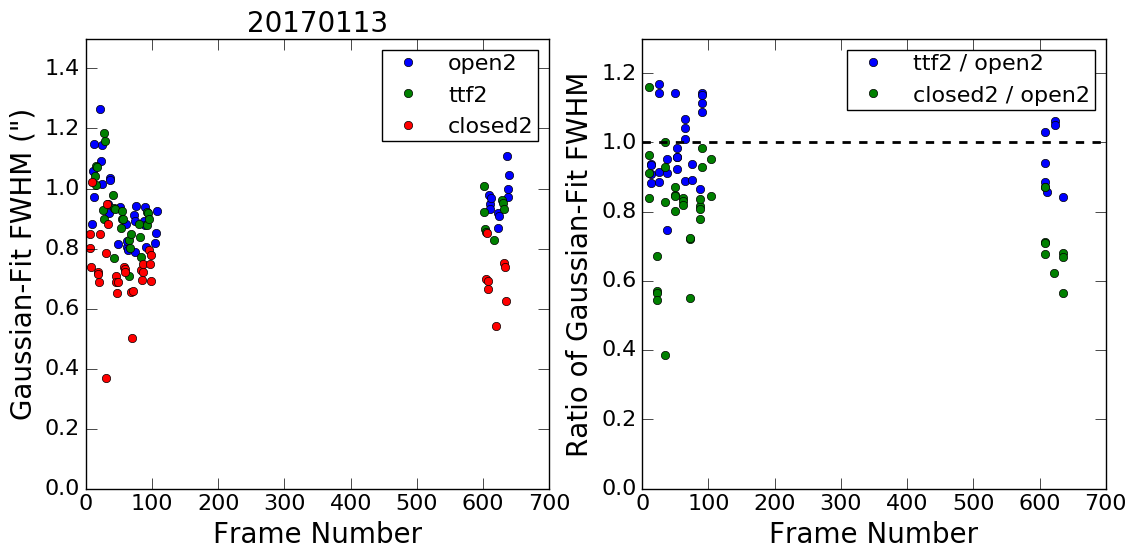

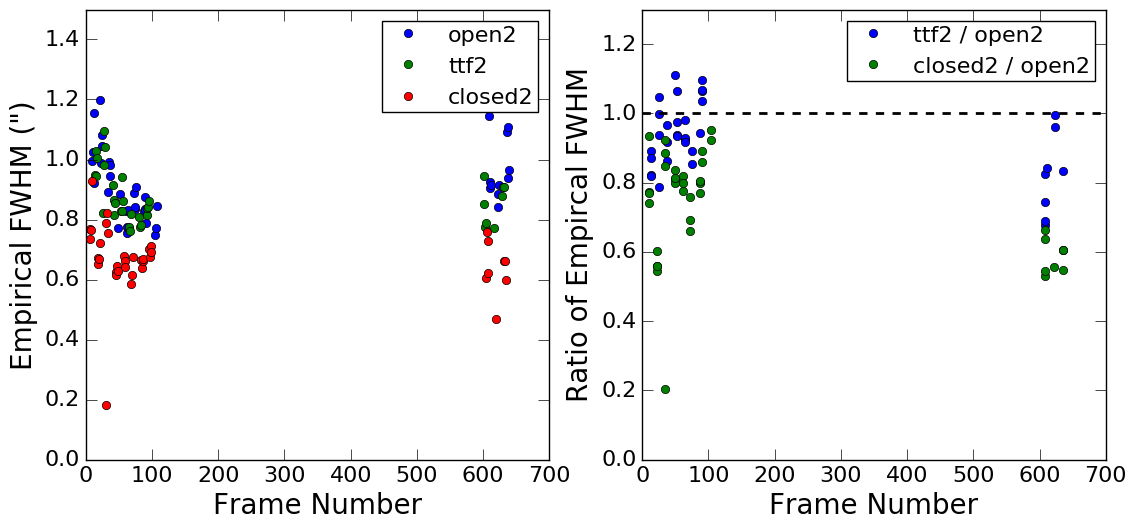

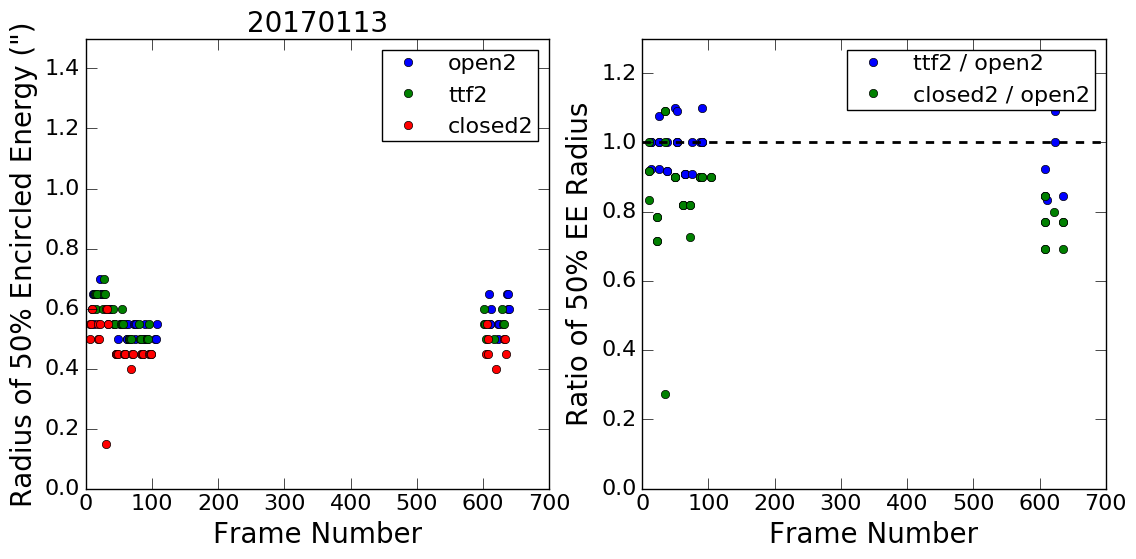

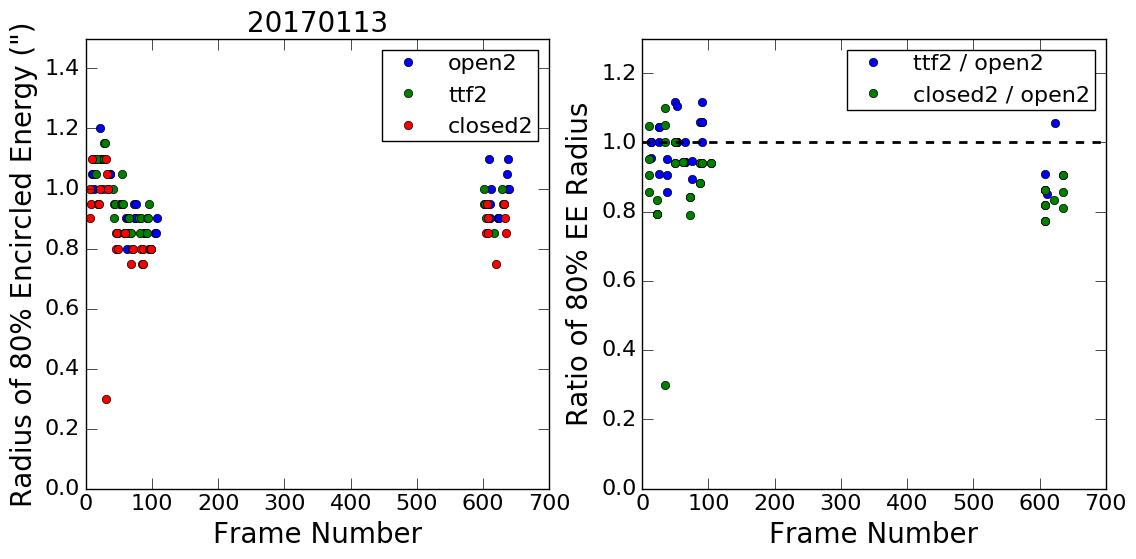

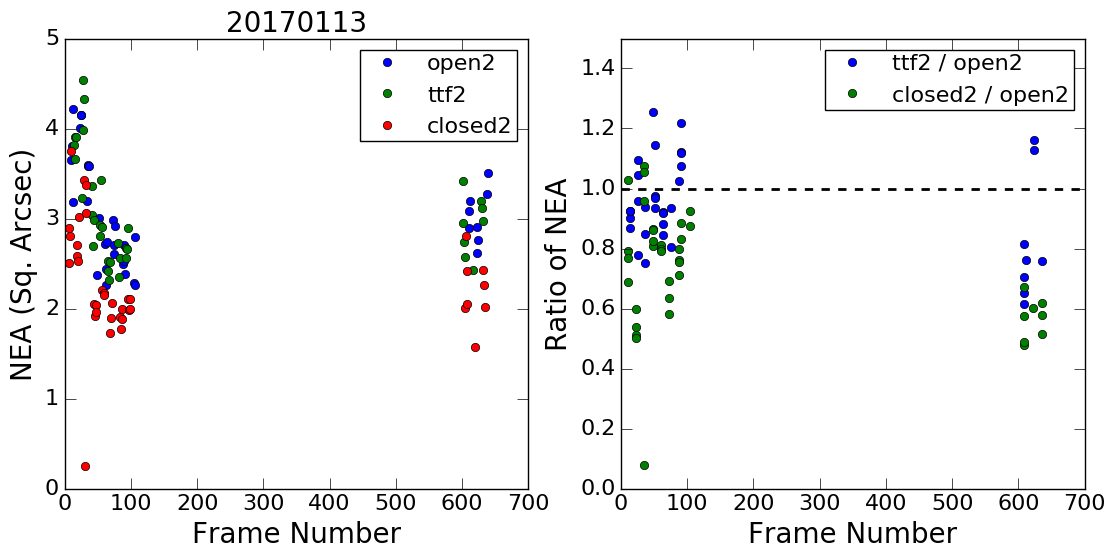

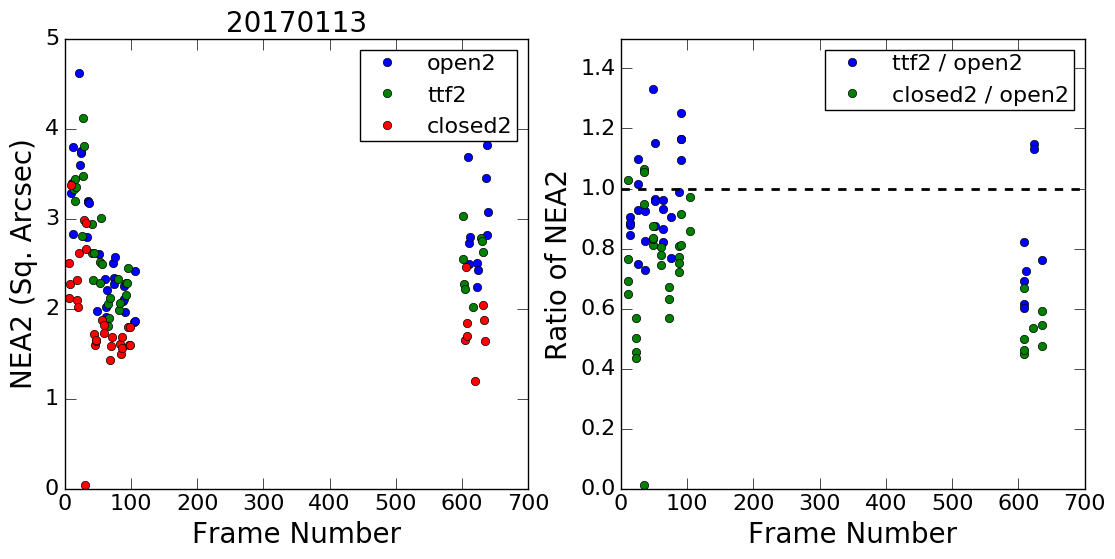

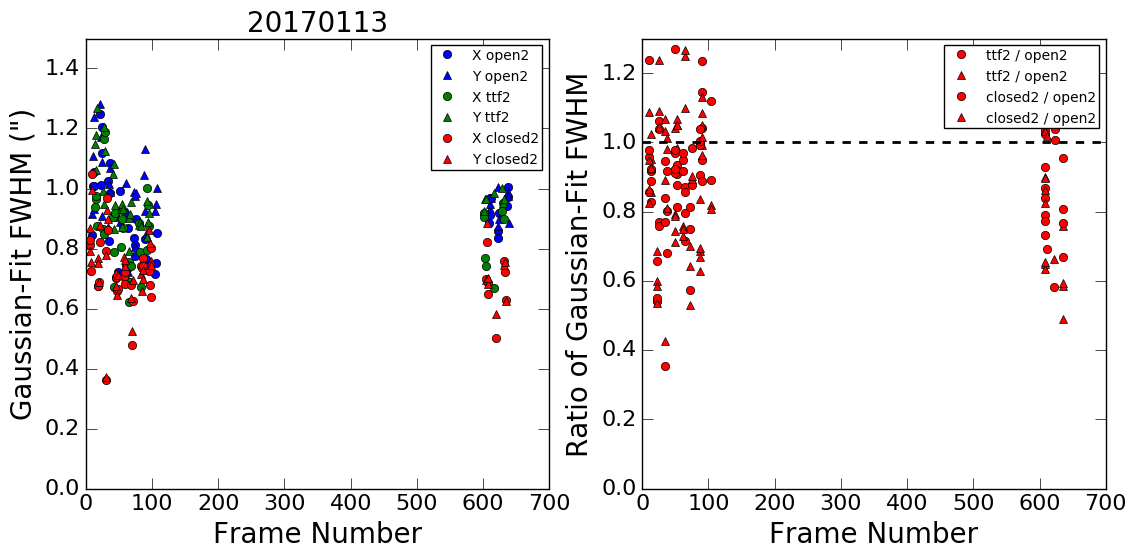

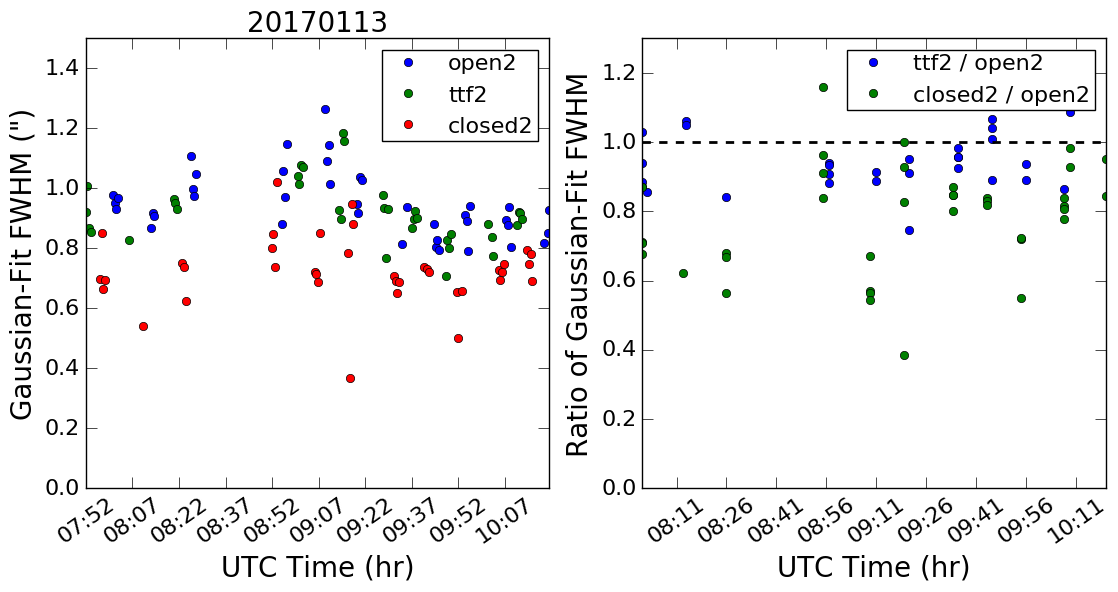

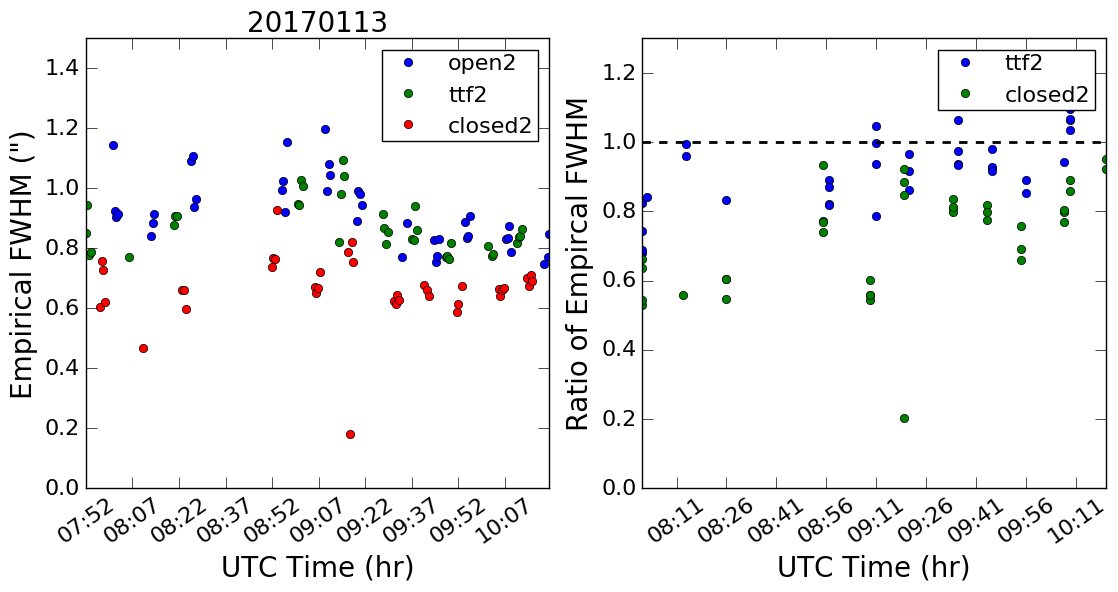

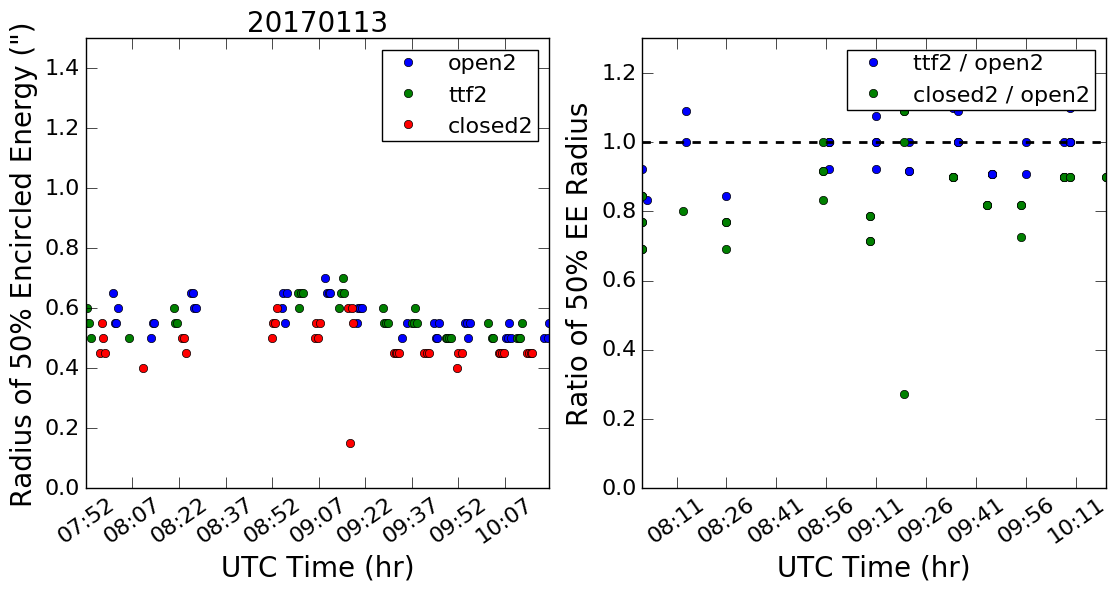

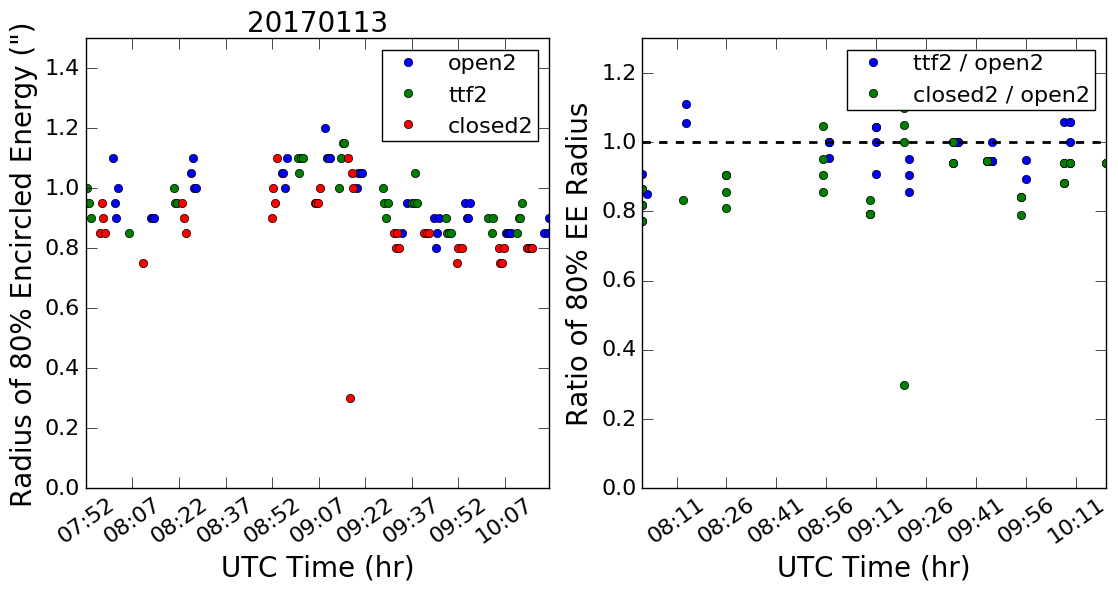

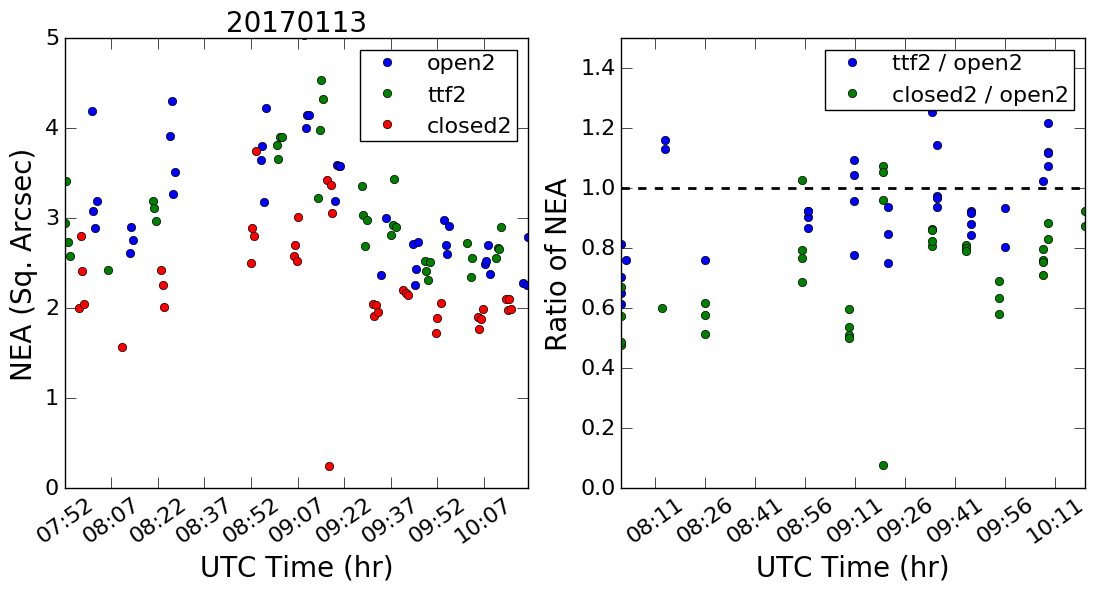

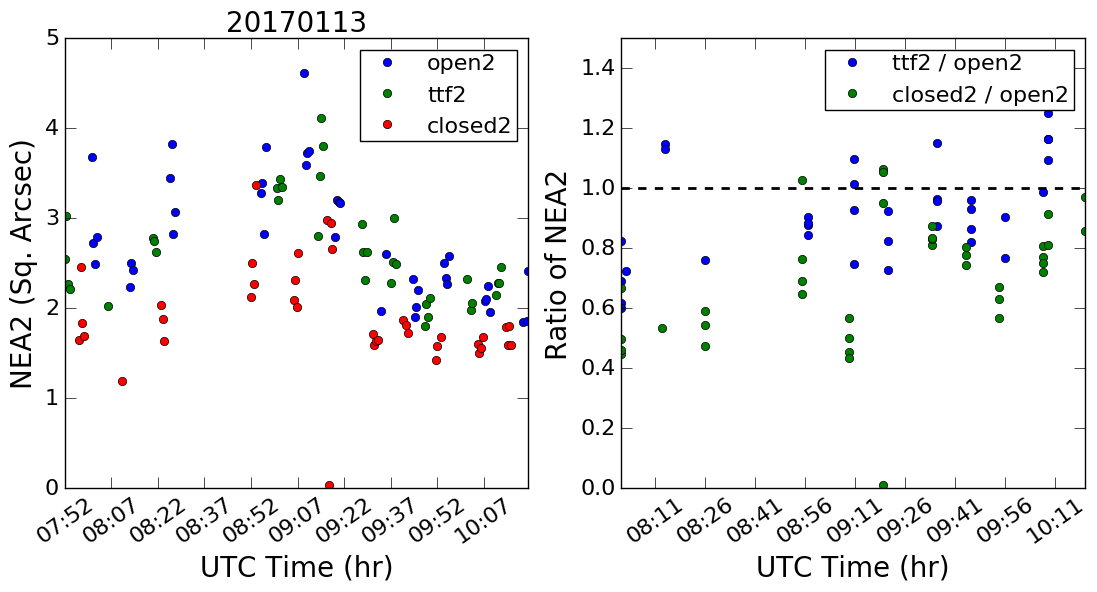

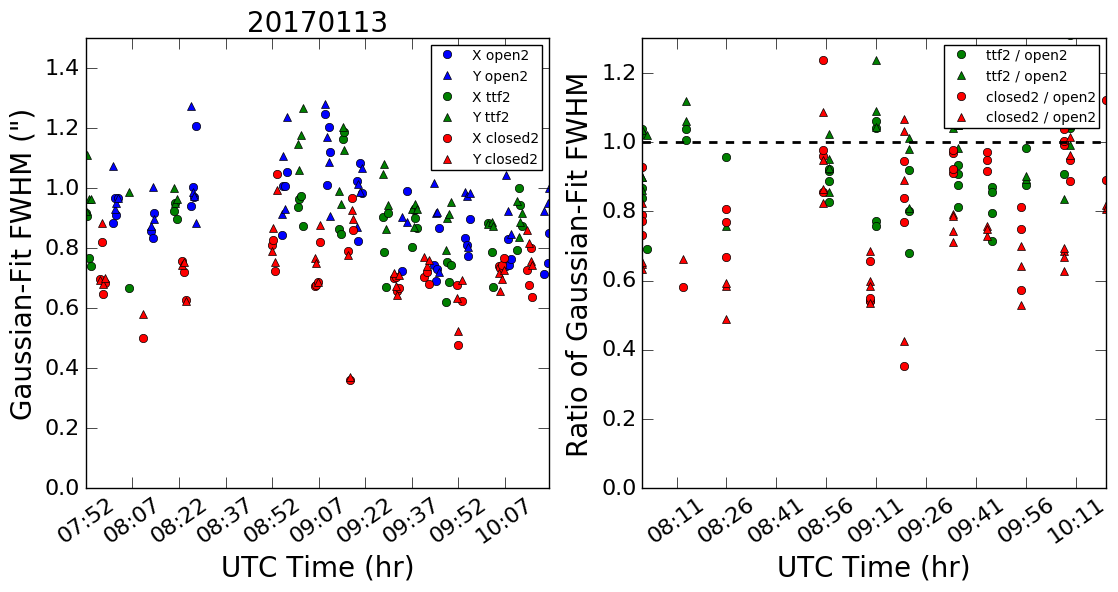

In [68]:
reload(plot_stats)
plot_stats.plot_stack_stats('20170113', suffixes=['open2', 'ttf2', 'closed2'])

### East Orientation (first part of night)

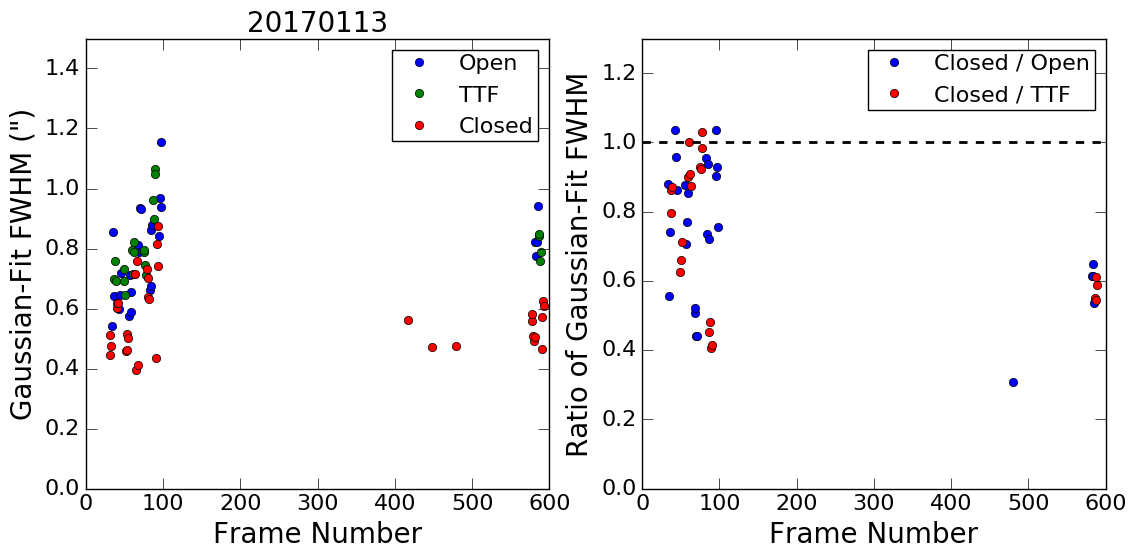

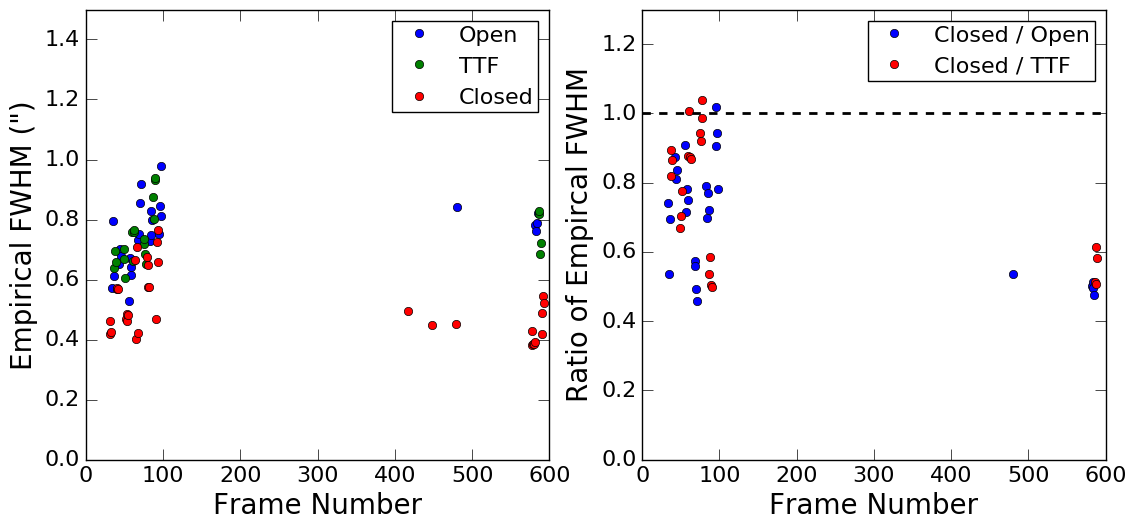

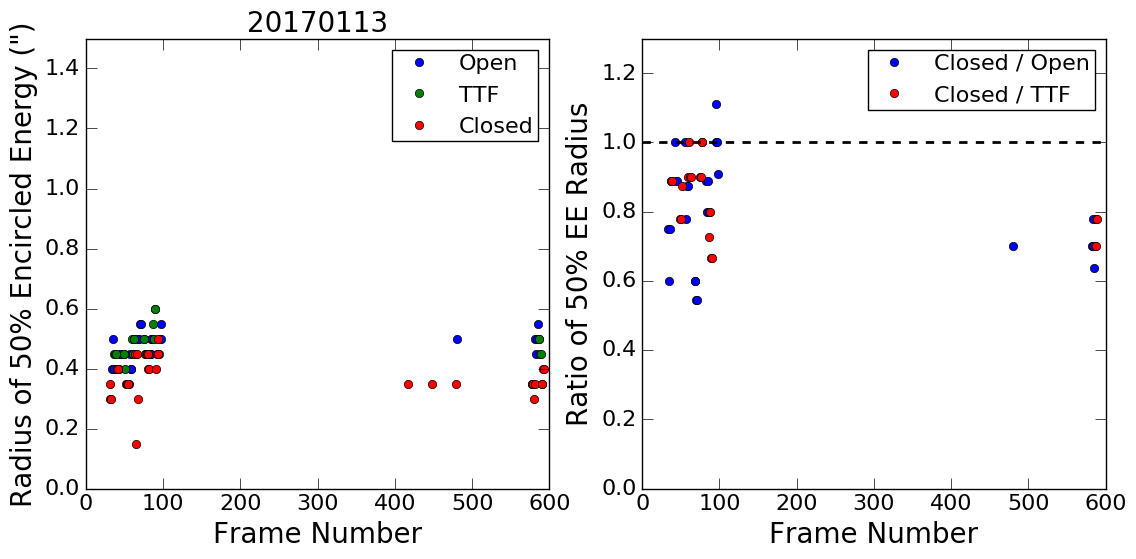

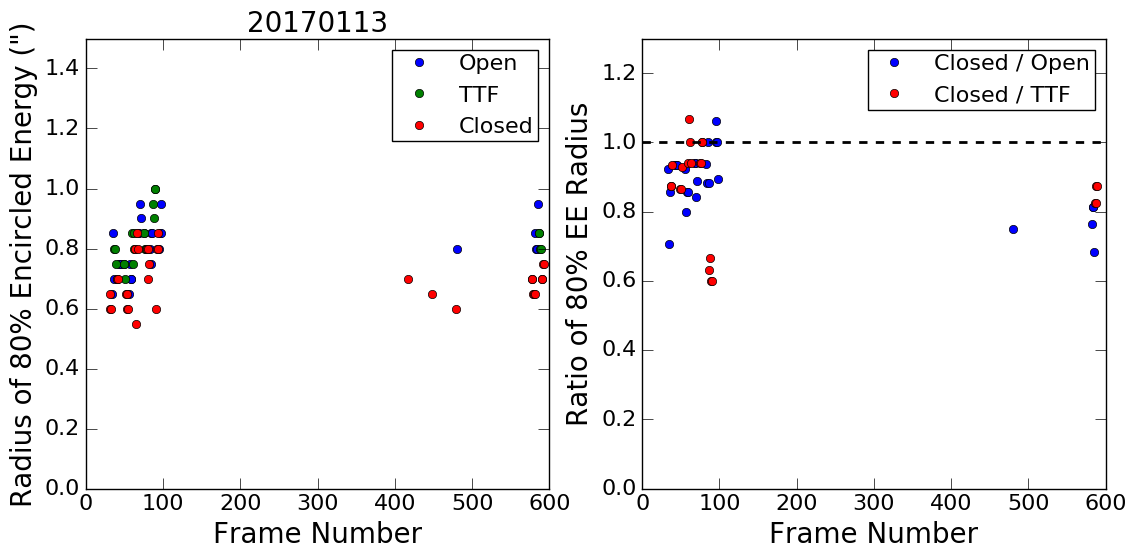

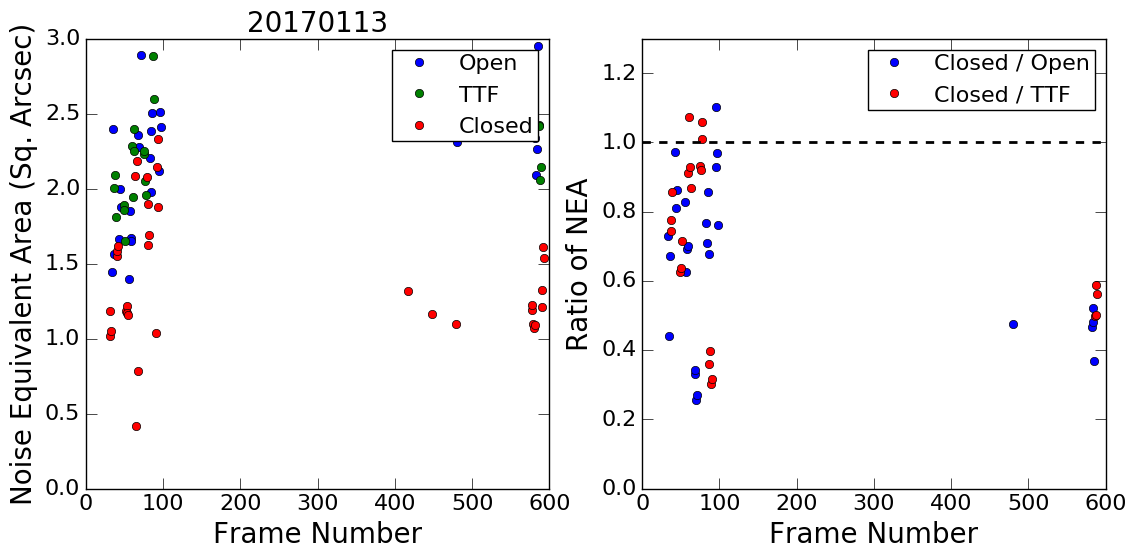

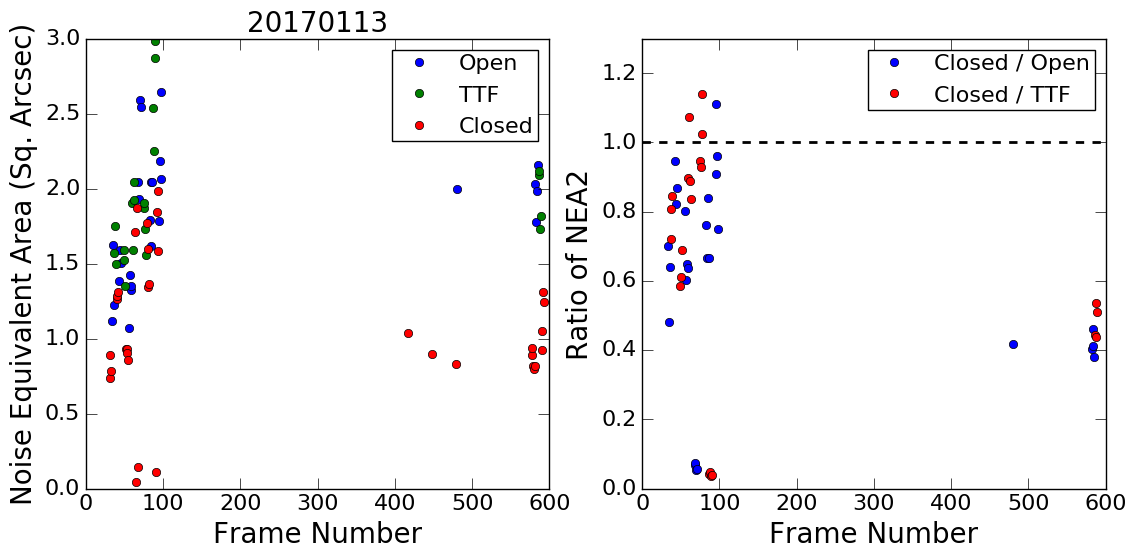

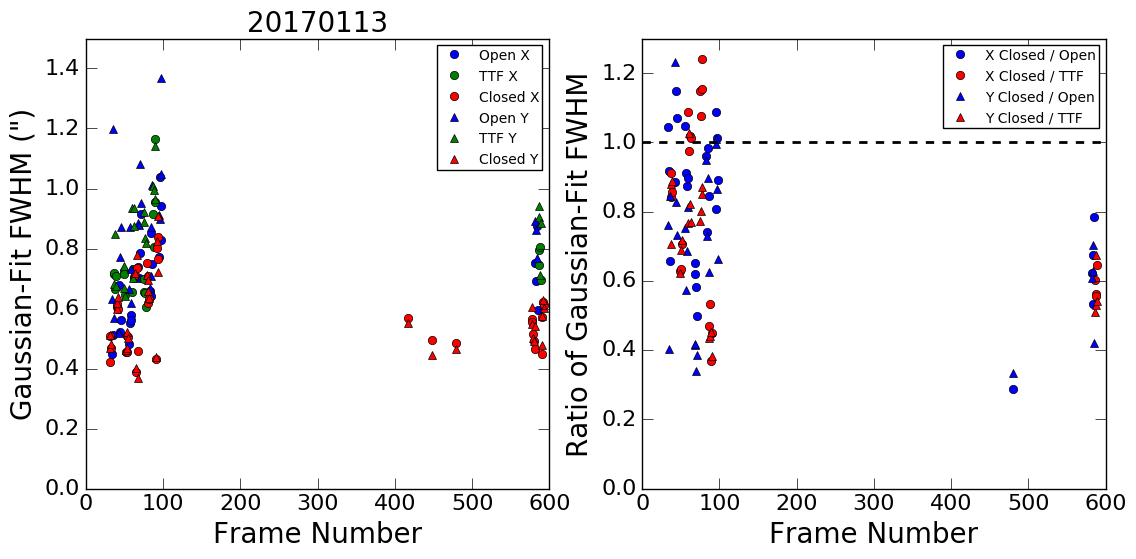

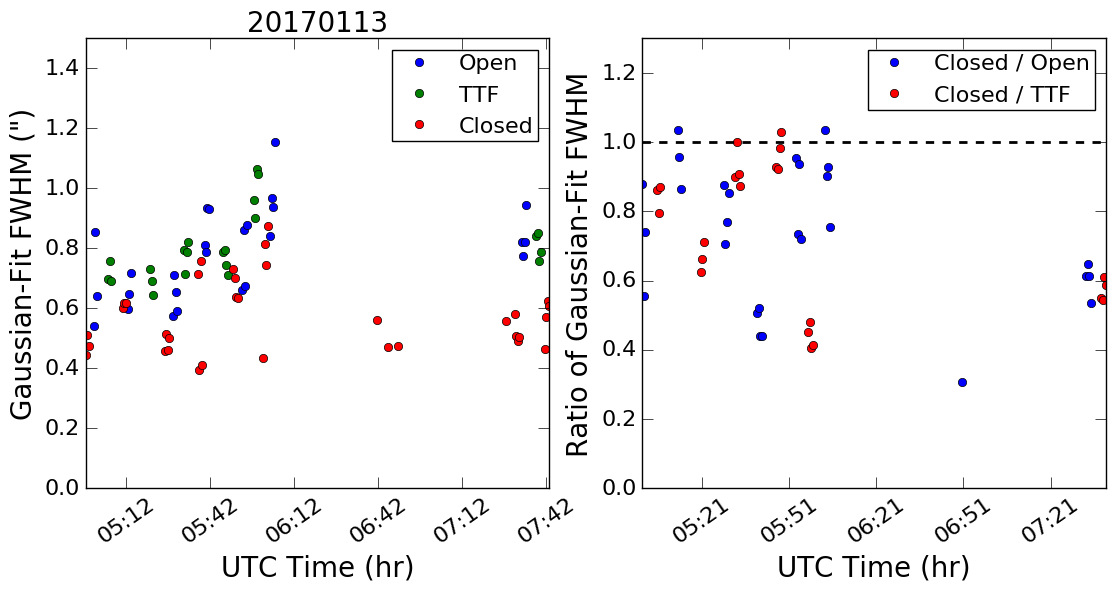

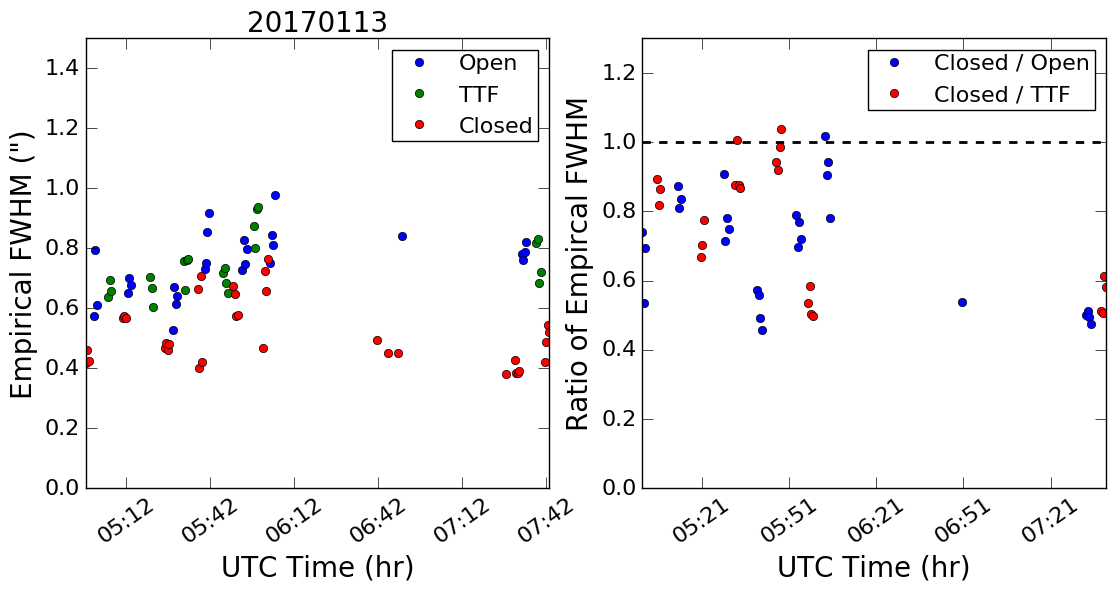

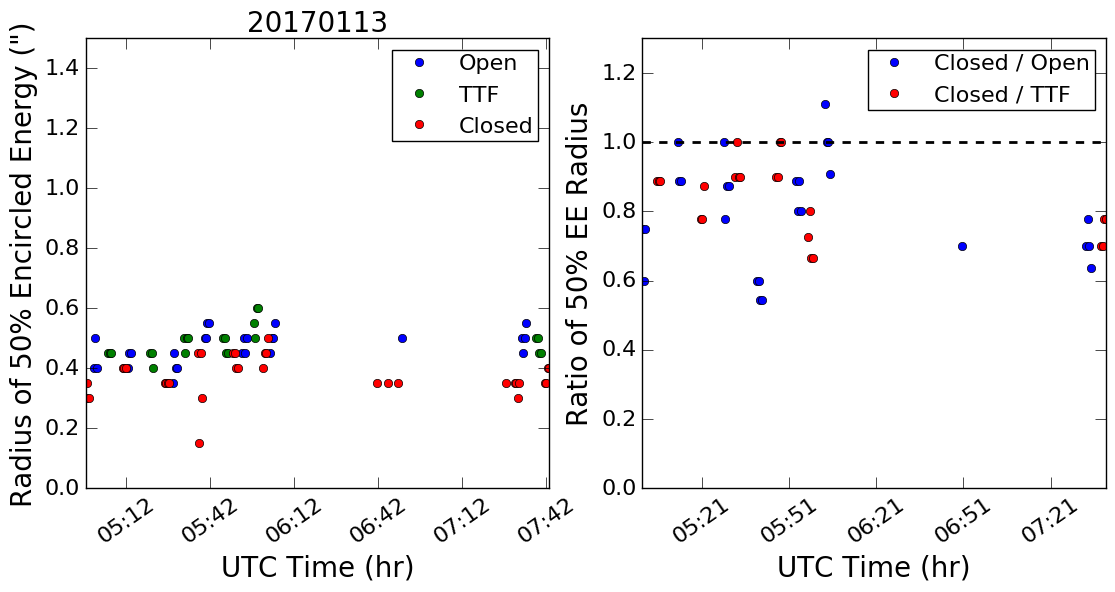

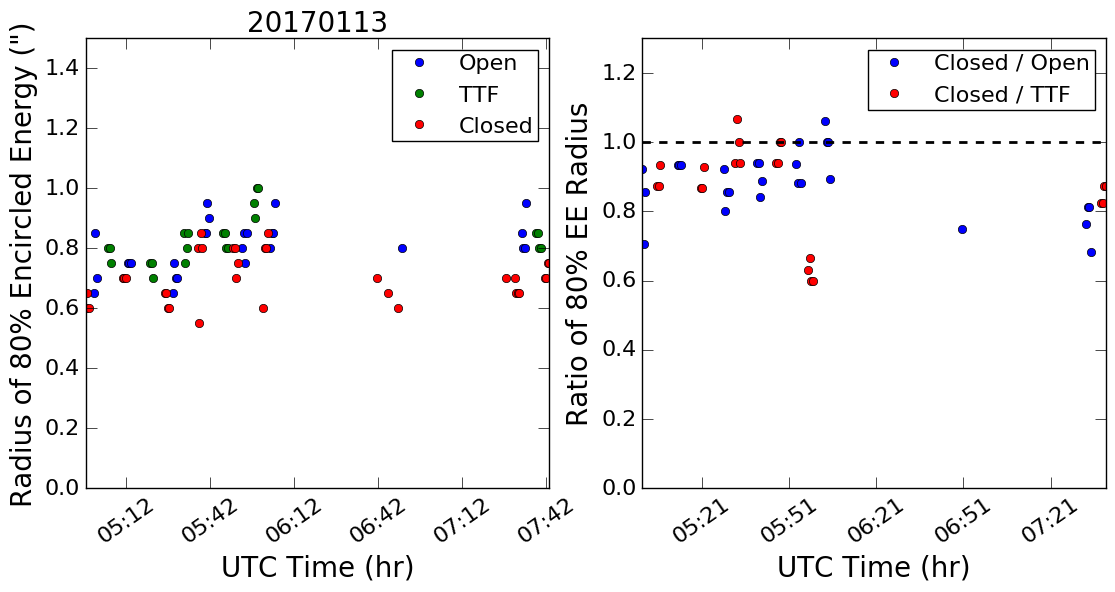

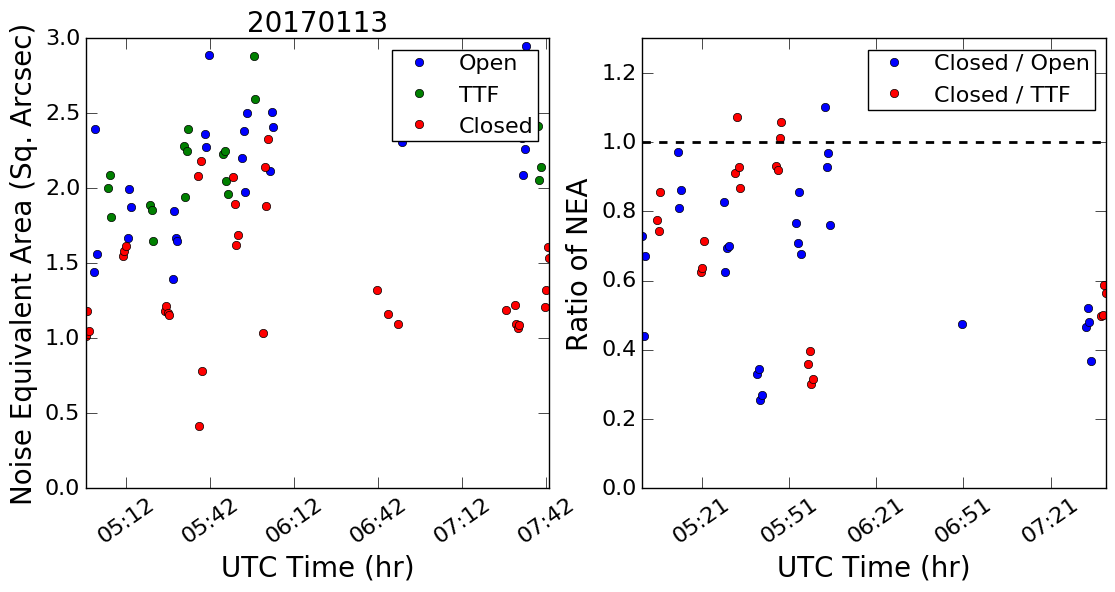

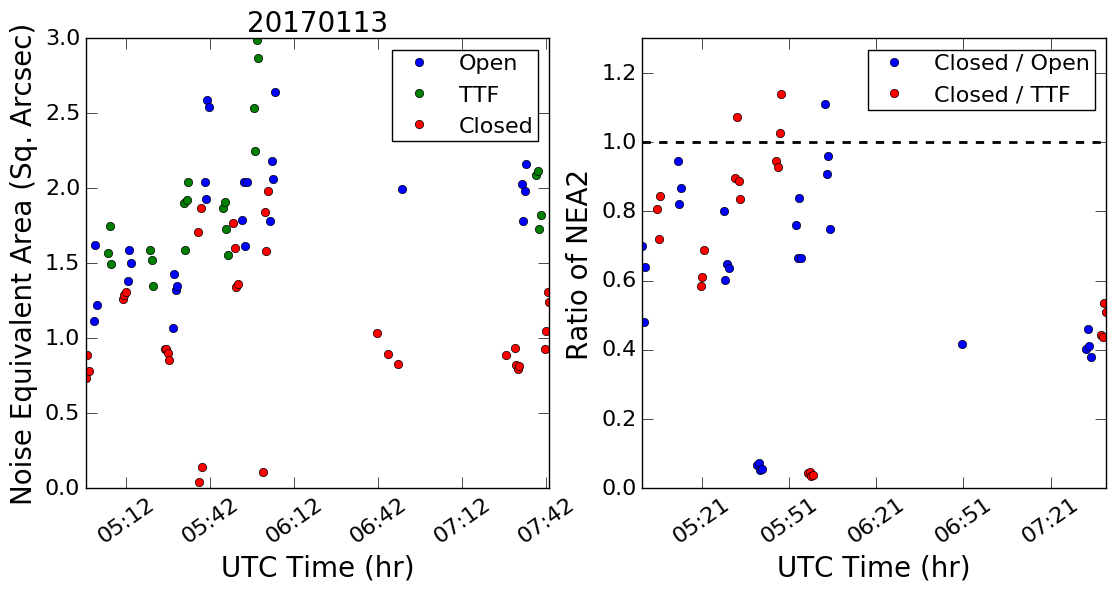

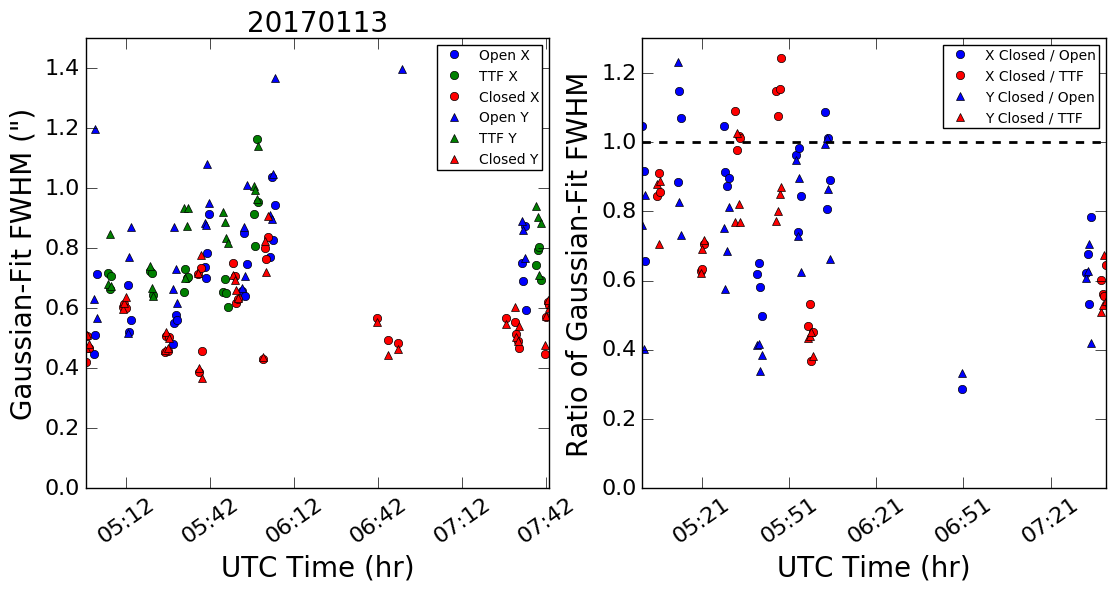

In [12]:
plot_stats.plot_stack_stats('20170113', suffix='1')

# Add MASS/DIMM data to the table.

In [40]:
from imaka.reduce import massdimm
reload(massdimm)

massdimm.fetch_data('20170114', '/Users/jlu/data/imaka/20170113/mkwc/')

Saving MASS/DIMM data to directory:
/Users/jlu/data/imaka/20170113/mkwc/


In [42]:
reload(massdimm)
%pdb on

mass_dimm_dir = '/Users/jlu/data/imaka/20170113/mkwc/'
stats_root = '/Users/jlu/work/imaka/pleiades/20170113/'

stats_file = stats_root + 'fli/reduce/stats/stats_open1.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'fli/reduce/stats/stats_ttf1.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'fli/reduce/stats/stats_closed1.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'fli/reduce/stats/stats_open2.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'fli/reduce/stats/stats_ttf2.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'fli/reduce/stats/stats_closed2.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)



Automatic pdb calling has been turned ON


OSError: File b'/Users/jlu/data/imaka/20170113/mkwc/20170113.dimm.dat' does not exist

> /Users/jlu/code/python/imaka/imaka/reduce/notebooks/pandas/parser.pyx(628)pandas.parser.TextReader._setup_parser_source (pandas/parser.c:6861)()

ipdb> u
> /Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/pandas/io/parsers.py(1213)__init__()
   1211         kwds['allow_leading_cols'] = self.index_col is not False
   1212 
-> 1213         self._reader = _parser.TextReader(src, **kwds)
   1214 
   1215         # XXX

ipdb> u
> /Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/pandas/io/parsers.py(799)_make_engine()
    797     def _make_engine(self, engine='c'):
    798         if engine == 'c':
--> 799             self._engine = CParserWrapper(self.f, **self.options)
    800         else:
    801             if engine == 'python':

ipdb> u
> /Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/pandas/io/parsers.py(645)__init__()
    643             self.options['has_index_names'] = kwds['has_index_names']
    644 
--> 645      

In [38]:
from astropy.table import Table
t = Table.read(stats_file.replace('.fits', '_mdp.fits'))


['Image', 'Index', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'DIMM', 'DIMM_dt_hr', 'MASS', 'MASS_dt_hr', 'Cn2dh_005', 'Cn2dh_010', 'Cn2dh_020', 'Cn2dh_040', 'Cn2dh_080', 'Cn2dh_160', 'Cn2dh_dt_hr']
                                   Image                                     Index  DATE_UTC  TIME_UTC  DATE_HST  TIME_HST      FWHM        FWHM_std    EE50 EE80      NEA           NEA2         xFWHM         yFWHM         theta         emp_fwhm    emp_fwhm_std  DIMM   DIMM_dt_hr   MASS    MASS_dt_hr   Cn2dh_005 Cn2dh_010 Cn2dh_020 Cn2dh_040 Cn2dh_080 Cn2dh_160  Cn2dh_dt_hr  
---------------------------------------------------------------------------- ----- ---------- -------- ---------- -------- ------------- -------------- ---- ---- ------------- ------------- ------------- ------------- -------------- ------------- -------------- ---- -------------- ---- --------------- ---------

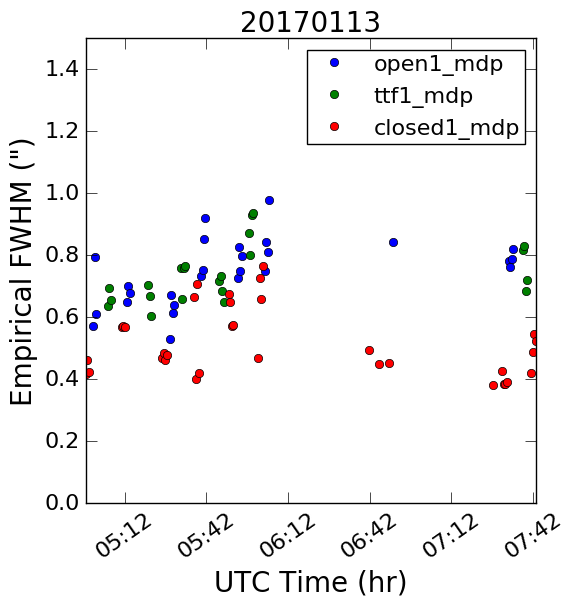

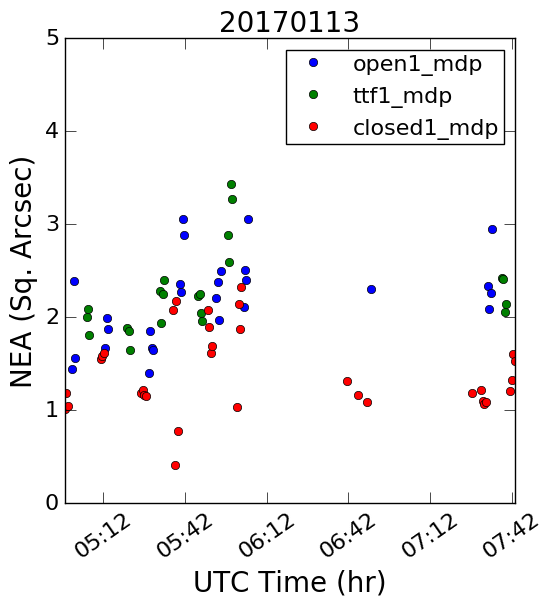

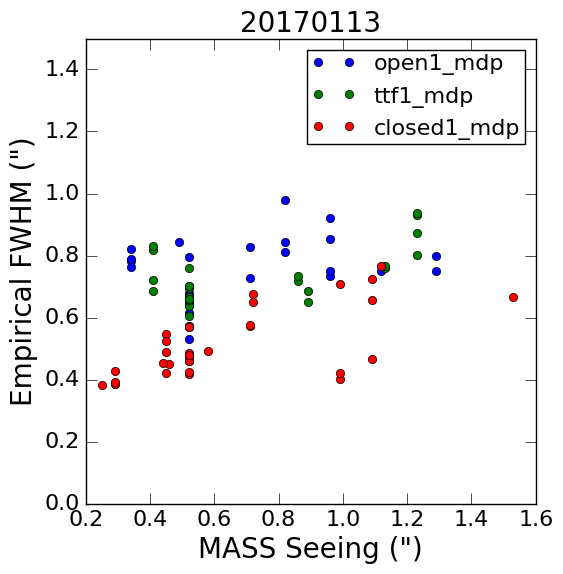

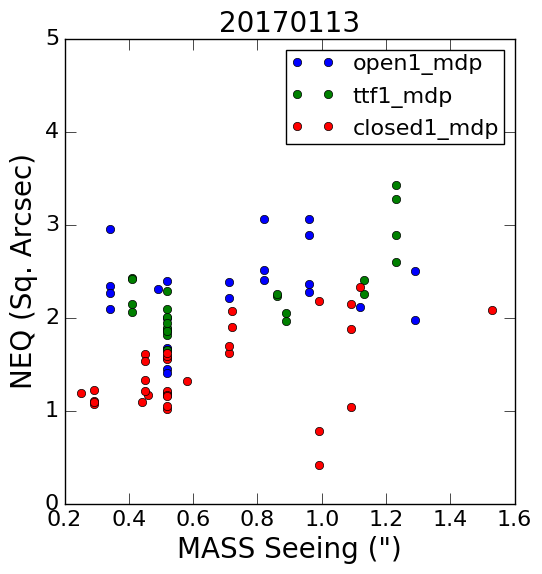

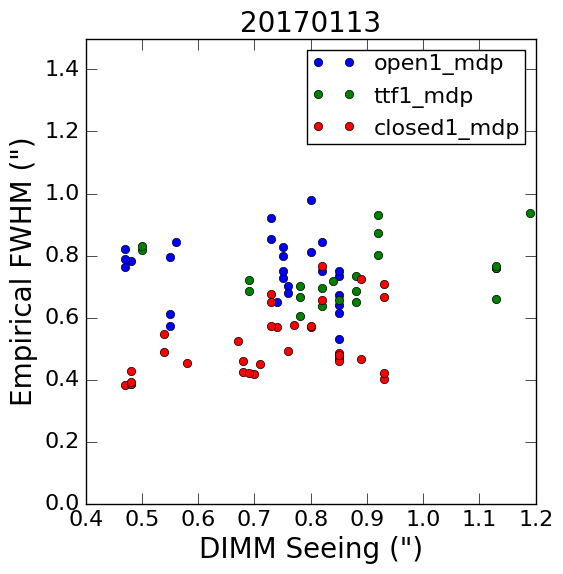

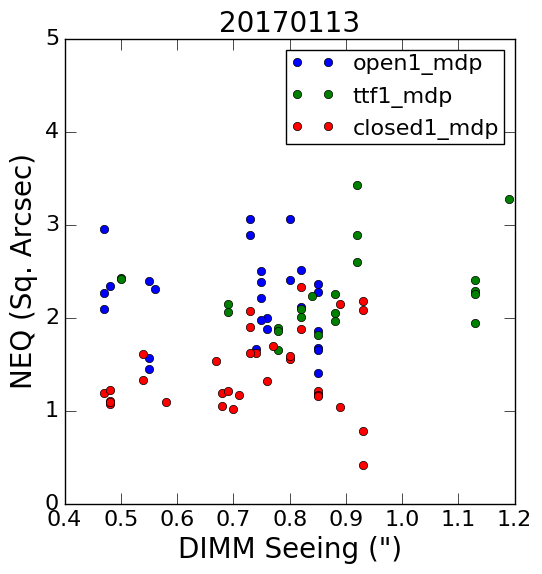

In [56]:
reload(plot_stats)
plot_stats.plot_stats_mdp('20170113', ['open1_mdp', 'ttf1_mdp', 'closed1_mdp'])
